In [19]:
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import xgboost as xgb
from xgboost import plot_tree

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
%matplotlib inline
import seaborn as sns

from hyperopt import hp
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

import sys
sys.path.insert(1, '../src/stproject')
from utils import *

In [4]:
def load_data_fe1(features_excluded, target):
    
    # function automatically exclude datapoints with non-zero entries in features_excluded
    # e.g. if aldehyde 'CHO' is excluded, any substance identified as aldehyde will be removed
    
    df = pd.read_csv('../data/df_fe1.csv', index_col=0)
    df = df[df[features_excluded].sum(axis=1) == 0]
    X = df[df.columns.difference(features_excluded + [target])]
    y = df[target]
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
    
    return X_train, X_valid, y_train, y_valid

In [5]:
def score(params):
    print("Training with params : ")
    print(params)
    num_round = int(params['n_estimators'])
    del params['n_estimators']
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dvalid = xgb.DMatrix(X_valid, label=y_valid)
    # watchlist = [(dvalid, 'eval'), (dtrain, 'train')]
    model = xgb.train(params, dtrain, num_round)
    predictions = model.predict(dvalid)
    score = np.sqrt(mean_squared_error(y_valid, predictions))
    print("\tScore {0}\n\n".format(score))
    return {'loss': score, 'status': STATUS_OK}

In [6]:
def optimize(trials):
    space = {
             'n_estimators' : hp.quniform('n_estimators', 100, 1000, 1),
             'eta' : hp.quniform('eta', 0.01, 0.10, 0.02),
             'max_depth' : hp.choice('max_depth', np.arange(1, 13, 1)),
             'min_child_weight' : hp.quniform('min_child_weight', 1, 6, 1),
             'subsample' : hp.quniform('subsample', 0.5, 1, 0.05),
             'gamma' : hp.quniform('gamma', 0.5, 1, 0.05),
             'colsample_bytree' : hp.quniform('colsample_bytree', 0.5, 1, 0.05),
             'eval_metric': 'rmse',
             'objective': 'reg:squarederror',
             'nthread' : 6,
             'silent' : 1,
             'seed': 42
             }

    best = fmin(score, space, algo=tpe.suggest, trials=trials, max_evals=250)

    print(best)

In [7]:
features_excluded = ['molecule', 'C-ring', 'C#C']
X_train, X_valid, y_train, y_valid = load_data_fe1(features_excluded, 'measured_st')

In [139]:
# Trials object where the history of search will be stored
trials = Trials()
optimize(trials)

Training with params :                                                                                                 
{'colsample_bytree': 0.55, 'eta': 0.1, 'eval_metric': 'rmse', 'gamma': 0.75, 'max_depth': 5, 'min_child_weight': 3.0, 'n_estimators': 519.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.9500000000000001}
	Score 1.21710337081731                                                                                                


Training with params :                                                                                                 
{'colsample_bytree': 0.6000000000000001, 'eta': 0.04, 'eval_metric': 'rmse', 'gamma': 0.65, 'max_depth': 12, 'min_child_weight': 6.0, 'n_estimators': 128.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.5}
	Score 1.5447391231706682                                                                                              


Training with params : 

	Score 1.1007900159047053                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.75, 'eta': 0.04, 'eval_metric': 'rmse', 'gamma': 0.75, 'max_depth': 10, 'min_child_weight': 3.0, 'n_estimators': 738.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 1.0}
	Score 1.17671250385897                                                                                                


Training with params :                                                                                                 
{'colsample_bytree': 0.65, 'eta': 0.08, 'eval_metric': 'rmse', 'gamma': 0.8, 'max_depth': 8, 'min_child_weight': 5.0, 'n_estimators': 359.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.55}
	Score 1.3616035043731654                          

	Score 1.392194143519629                                                                                               


Training with params :                                                                                                 
{'colsample_bytree': 1.0, 'eta': 0.1, 'eval_metric': 'rmse', 'gamma': 1.0, 'max_depth': 3, 'min_child_weight': 2.0, 'n_estimators': 252.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.8}
	Score 1.2314580645314128                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.55, 'eta': 0.08, 'eval_metric': 'rmse', 'gamma': 0.9, 'max_depth': 5, 'min_child_weight': 3.0, 'n_estimators': 106.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.9}
	Score 1.1757315117716431                               

	Score 0.9604826837580064                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.6000000000000001, 'eta': 0.02, 'eval_metric': 'rmse', 'gamma': 0.6000000000000001, 'max_depth': 11, 'min_child_weight': 1.0, 'n_estimators': 375.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.9}
	Score 1.024781932935047                                                                                               


Training with params :                                                                                                 
{'colsample_bytree': 0.5, 'eta': 0.04, 'eval_metric': 'rmse', 'gamma': 0.65, 'max_depth': 11, 'min_child_weight': 1.0, 'n_estimators': 262.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 1.0}
	Score 1.03763798528092

	Score 1.0792291584111455                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.5, 'eta': 0.06, 'eval_metric': 'rmse', 'gamma': 0.6000000000000001, 'max_depth': 11, 'min_child_weight': 2.0, 'n_estimators': 531.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.8500000000000001}
	Score 1.1081087139963377                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.7000000000000001, 'eta': 0.1, 'eval_metric': 'rmse', 'gamma': 0.75, 'max_depth': 12, 'min_child_weight': 3.0, 'n_estimators': 416.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.950000000000

	Score 1.1936402114953633                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.8, 'eta': 0.08, 'eval_metric': 'rmse', 'gamma': 0.55, 'max_depth': 8, 'min_child_weight': 1.0, 'n_estimators': 101.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.9500000000000001}
	Score 1.0684020078756964                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.8500000000000001, 'eta': 0.06, 'eval_metric': 'rmse', 'gamma': 0.7000000000000001, 'max_depth': 5, 'min_child_weight': 2.0, 'n_estimators': 454.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.8500000000000

	Score 0.9563161609671249                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.8, 'eta': 0.1, 'eval_metric': 'rmse', 'gamma': 0.65, 'max_depth': 5, 'min_child_weight': 1.0, 'n_estimators': 215.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 1.0}
	Score 1.0640600886414069                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.9, 'eta': 0.1, 'eval_metric': 'rmse', 'gamma': 0.6000000000000001, 'max_depth': 5, 'min_child_weight': 1.0, 'n_estimators': 249.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 1.0}
	Score 0.9909001164863007                 

	Score 1.1035426114130595                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.75, 'eta': 0.08, 'eval_metric': 'rmse', 'gamma': 0.6000000000000001, 'max_depth': 12, 'min_child_weight': 2.0, 'n_estimators': 258.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.9}
	Score 1.1556181672671602                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.8, 'eta': 0.1, 'eval_metric': 'rmse', 'gamma': 0.65, 'max_depth': 5, 'min_child_weight': 6.0, 'n_estimators': 323.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.9500000000000001}
	Score 1.3099719989582  

	Score 1.1046493605267693                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.9500000000000001, 'eta': 0.1, 'eval_metric': 'rmse', 'gamma': 0.75, 'max_depth': 8, 'min_child_weight': 1.0, 'n_estimators': 769.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.9}
	Score 1.061145006101771                                                                                               


Training with params :                                                                                                 
{'colsample_bytree': 0.9, 'eta': 0.08, 'eval_metric': 'rmse', 'gamma': 0.7000000000000001, 'max_depth': 9, 'min_child_weight': 2.0, 'n_estimators': 539.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.9500000000000001}
	Score 1.37

	Score 1.3578006474212174                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.8500000000000001, 'eta': 0.1, 'eval_metric': 'rmse', 'gamma': 0.65, 'max_depth': 6, 'min_child_weight': 1.0, 'n_estimators': 363.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.9500000000000001}
	Score 1.0268692819225964                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.9, 'eta': 0.1, 'eval_metric': 'rmse', 'gamma': 0.8500000000000001, 'max_depth': 7, 'min_child_weight': 2.0, 'n_estimators': 307.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.75}
	Score 1.26

Best rmse of 0.9435 achieved with colsample_by_tree: 0.85, eta: 0.1, gamma: 0.70, max_depth: 4, min_child_weight: 1.0, n_estimators: 498, subsample: 1

In [140]:
# Training model with best params
xgb_best = xgb.XGBRegressor(n_estimators=498,
                            learning_rate=0.1,
                            max_depth=4,
                            min_child_weight=1,
                            subsample=1,
                            gamma=0.7,
                            colsample_by_tree=0.85,
                            objective='reg:squarederror',
                            n_jobs=6,
                            verbosity=3,
                           random_state=42)
xgb_best.fit(X_train, y_train, early_stopping_rounds=25, eval_set=[(X_valid, y_valid)])

[21:49:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[0]	validation_0-rmse:22.9885
Will train until validation_0-rmse hasn't improved in 25 rounds.
[21:49:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[1]	validation_0-rmse:20.6764
[21:49:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[2]	validation_0-rmse:18.6371
[21:49:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[3]	validation_0-rmse:16.8012
[21:49:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[4]	validation_0-rmse:15.1832
[21:49:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[5]	validation_0-rmse:13.6972
[21:49:36] INFO: src/tree/updater_prune.cc:74: tree p

[21:49:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 4 pruned nodes, max_depth=4
[55]	validation_0-rmse:1.05392
[21:49:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 2 pruned nodes, max_depth=4
[56]	validation_0-rmse:1.0526
[21:49:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 4 pruned nodes, max_depth=4
[57]	validation_0-rmse:1.0515
[21:49:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 4 pruned nodes, max_depth=4
[58]	validation_0-rmse:1.0469
[21:49:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 10 pruned nodes, max_depth=4
[59]	validation_0-rmse:1.04533
[21:49:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 4 pruned nodes, max_depth=4
[60]	validation_0-rmse:1.04119
[21:49:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 8 pruned nodes, ma

[21:49:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[110]	validation_0-rmse:0.980108
Stopping. Best iteration:
[85]	validation_0-rmse:0.97913



XGBRegressor(colsample_by_tree=0.85, gamma=0.7, max_depth=4, n_estimators=498,
             n_jobs=6, objective='reg:squarederror', random_state=42,
             verbosity=3)

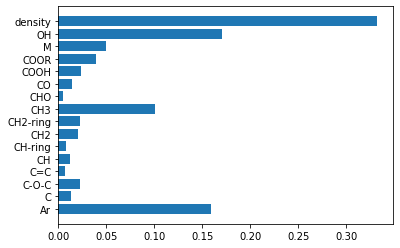

In [141]:
# feature importances
plt.barh(X_train.columns, xgb_best.feature_importances_)
plt.show()

In [1]:
# fig, ax = plt.subplots(figsize=(30, 30))
# plot_tree(xgb_best, ax=ax)

In [143]:
print(f"rmse = {np.sqrt(np.mean((xgb_best.predict(X_valid)-y_valid)**2))}")

rmse = 0.9791295177603749


In [144]:
pd.DataFrame({'y_hat': xgb_best.predict(X_valid), 'y': y_valid})

,y_hat,y
186,28.417618,26.4
121,21.943361,21.4
142,33.551643,34.5
221,25.798569,25.2
46,26.381329,26.0
283,23.518585,24.2
149,24.677544,25.7
117,18.448202,19.1
99,36.940262,36.0
87,28.340403,28.4


TODOs by priority:

0. try features scaled by molecular weight, molecular fragments only
1. do the same with multiple train-test(valid) splitting + weighted prediction
2. use triple split: train, valid, test with test set matching the literature data df_stliq_clean was taken from
3. test each final model against feature-engineered polymer

## XGB with train, valid, test split

In [25]:
def load_data_fe1_2(features_excluded, target):
    df_ref = pd.read_csv('../data/df_stliq_clean.csv', index_col=0)
    df = pd.read_csv('../data/df_fe1.csv', index_col=0)
    df = df[df[features_excluded].sum(axis=1) == 0]
    
    # pulling index of test data from ref (original_id column contains 'Test')
    test_idx = df_ref[df_ref['original_id'].str.contains('Test')].index.tolist()
    df_train = df[~df.index.isin(test_idx)]
    df_test = df[df.index.isin(test_idx)]
    X_train = df_train[df_train.columns.difference(features_excluded + [target])]
    y_train = df_train[target]
    X_test = df_test[df_test.columns.difference(features_excluded + [target])]
    y_test = df_test[target]
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
    
    return X_train, X_valid, X_test, y_train, y_valid, y_test

In [26]:
X_train, X_valid, X_test, y_train, y_valid, y_test = \
load_data_fe1_2(features_excluded, 'measured_st')
len(X_train), len(X_valid), len(X_test)

(206, 37, 23)

In [67]:
# trials2 = Trials()
# optimize(trials2)

Training with params :                                                                                                 
{'colsample_bytree': 0.65, 'eta': 0.04, 'eval_metric': 'rmse', 'gamma': 0.7000000000000001, 'max_depth': 1, 'min_child_weight': 2.0, 'n_estimators': 960.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.6000000000000001}
	Score 1.4713869311298176                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 1.0, 'eta': 0.02, 'eval_metric': 'rmse', 'gamma': 0.6000000000000001, 'max_depth': 9, 'min_child_weight': 4.0, 'n_estimators': 712.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.8500000000000001}
	Score 1.2543864260454574                                                                                            

	Score 1.3241326423144424                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.75, 'eta': 0.06, 'eval_metric': 'rmse', 'gamma': 0.55, 'max_depth': 7, 'min_child_weight': 1.0, 'n_estimators': 648.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.9}
	Score 1.2917912142826655                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.65, 'eta': 0.1, 'eval_metric': 'rmse', 'gamma': 0.55, 'max_depth': 3, 'min_child_weight': 5.0, 'n_estimators': 944.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.6000000000000001}
	Score 1.2911709061463563             

	Score 1.3594901638922017                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 1.0, 'eta': 0.1, 'eval_metric': 'rmse', 'gamma': 0.8500000000000001, 'max_depth': 7, 'min_child_weight': 3.0, 'n_estimators': 646.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.55}
	Score 1.29295428572767                                                                                                


Training with params :                                                                                                 
{'colsample_bytree': 0.55, 'eta': 0.04, 'eval_metric': 'rmse', 'gamma': 0.8, 'max_depth': 5, 'min_child_weight': 1.0, 'n_estimators': 483.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.6000000000000001}
	Score 1.255428891074794 

	Score 1.2282935605394218                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.8500000000000001, 'eta': 0.06, 'eval_metric': 'rmse', 'gamma': 0.5, 'max_depth': 10, 'min_child_weight': 5.0, 'n_estimators': 388.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.5}
	Score 1.5195928965221868                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.8, 'eta': 0.08, 'eval_metric': 'rmse', 'gamma': 0.6000000000000001, 'max_depth': 10, 'min_child_weight': 3.0, 'n_estimators': 174.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.55}
	Score 1.38682826778701

	Score 1.2834091565983                                                                                                 


Training with params :                                                                                                 
{'colsample_bytree': 0.75, 'eta': 0.04, 'eval_metric': 'rmse', 'gamma': 0.65, 'max_depth': 9, 'min_child_weight': 1.0, 'n_estimators': 601.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.65}
	Score 1.2094148925411246                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.65, 'eta': 0.02, 'eval_metric': 'rmse', 'gamma': 0.75, 'max_depth': 4, 'min_child_weight': 2.0, 'n_estimators': 873.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.75}
	Score 1.2657184296496673                         

	Score 1.2449514482506878                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.9, 'eta': 0.04, 'eval_metric': 'rmse', 'gamma': 0.5, 'max_depth': 5, 'min_child_weight': 3.0, 'n_estimators': 969.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.6000000000000001}
	Score 1.24378359993976                                                                                                


Training with params :                                                                                                 
{'colsample_bytree': 0.8, 'eta': 0.06, 'eval_metric': 'rmse', 'gamma': 0.55, 'max_depth': 11, 'min_child_weight': 1.0, 'n_estimators': 828.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.65}
	Score 1.3672354858318236             

	Score 1.1569714091722032                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.8, 'eta': 0.04, 'eval_metric': 'rmse', 'gamma': 0.55, 'max_depth': 12, 'min_child_weight': 1.0, 'n_estimators': 788.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.55}
	Score 1.2595128353913536                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.75, 'eta': 0.04, 'eval_metric': 'rmse', 'gamma': 0.55, 'max_depth': 12, 'min_child_weight': 1.0, 'n_estimators': 810.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.6000000000000001}
	Score 1.1488000415062036          

	Score 1.1926702296089553                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.8, 'eta': 0.06, 'eval_metric': 'rmse', 'gamma': 0.55, 'max_depth': 6, 'min_child_weight': 3.0, 'n_estimators': 776.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.5}
	Score 1.3443017861650368                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.75, 'eta': 0.04, 'eval_metric': 'rmse', 'gamma': 0.6000000000000001, 'max_depth': 8, 'min_child_weight': 1.0, 'n_estimators': 620.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.65}
	Score 1.2108506840799802             

	Score 1.1838710850218763                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.75, 'eta': 0.04, 'eval_metric': 'rmse', 'gamma': 0.5, 'max_depth': 9, 'min_child_weight': 1.0, 'n_estimators': 732.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.55}
	Score 1.2605234095279478                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.8, 'eta': 0.04, 'eval_metric': 'rmse', 'gamma': 0.65, 'max_depth': 11, 'min_child_weight': 2.0, 'n_estimators': 503.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.6000000000000001}
	Score 1.1506780886817842            

	Score 1.2180094952319944                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.7000000000000001, 'eta': 0.02, 'eval_metric': 'rmse', 'gamma': 0.7000000000000001, 'max_depth': 2, 'min_child_weight': 1.0, 'n_estimators': 560.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.5}
	Score 1.3972270531675741                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.6000000000000001, 'eta': 0.04, 'eval_metric': 'rmse', 'gamma': 0.8500000000000001, 'max_depth': 12, 'min_child_weight': 2.0, 'n_estimators': 626.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 

	Score 1.1732970258722177                                                                                              


100%|██████████████████████████████████████████████| 250/250 [05:01<00:00,  1.21s/trial, best loss: 1.1149730780307279]
{'colsample_bytree': 0.7000000000000001, 'eta': 0.04, 'gamma': 0.6000000000000001, 'max_depth': 11, 'min_child_weight': 1.0, 'n_estimators': 679.0, 'subsample': 0.6000000000000001}


Best rmse of 1.115 achieved with colsample_by_tree: 0.7, eta: 0.04, gamma: 0.6, max_depth: 11, min_child_weight: 1.0, n_estimators: 679, subsample: 0.6

In [27]:
# check index consistency with 'append'
print(all(X_train.append(X_valid).index == y_train.append(y_valid).index))

True


In [28]:
# Training model with best params
xgb_best2_1 = xgb.XGBRegressor(n_estimators=679,
                            learning_rate=0.04,
                            max_depth=11,
                            min_child_weight=1,
                            subsample=0.6,
                            gamma=0.6,
                            colsample_by_tree=0.7,
                            objective='reg:squarederror',
                            n_jobs=6,
                            verbosity=3,
                            random_state=42)
xgb_best2_1.fit(X_train.append(X_valid), y_train.append(y_valid), eval_set=[(X_test, y_test)])

[21:38:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[0]	validation_0-rmse:26.6122
[21:38:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[1]	validation_0-rmse:25.6038
[21:38:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[2]	validation_0-rmse:24.6275
[21:38:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[3]	validation_0-rmse:23.6863
[21:38:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[4]	validation_0-rmse:22.804
[21:38:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[5]	validation_0-rmse:21.9198
[21:38:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[6

[21:38:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 10 pruned nodes, max_depth=7
[56]	validation_0-rmse:3.70854
[21:38:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 10 pruned nodes, max_depth=6
[57]	validation_0-rmse:3.58843
[21:38:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 2 pruned nodes, max_depth=10
[58]	validation_0-rmse:3.49576
[21:38:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 4 pruned nodes, max_depth=9
[59]	validation_0-rmse:3.39438
[21:38:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 10 pruned nodes, max_depth=8
[60]	validation_0-rmse:3.30432
[21:38:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 16 pruned nodes, max_depth=9
[61]	validation_0-rmse:3.20986
[21:38:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 8 pruned no

[21:38:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 82 pruned nodes, max_depth=9
[110]	validation_0-rmse:1.44078
[21:38:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 62 pruned nodes, max_depth=9
[111]	validation_0-rmse:1.42499
[21:38:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 104 pruned nodes, max_depth=8
[112]	validation_0-rmse:1.41589
[21:38:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 70 pruned nodes, max_depth=9
[113]	validation_0-rmse:1.39708
[21:38:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 66 pruned nodes, max_depth=9
[114]	validation_0-rmse:1.39614
[21:38:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 86 pruned nodes, max_depth=8
[115]	validation_0-rmse:1.39549
[21:38:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 56 

[21:38:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 100 pruned nodes, max_depth=8
[165]	validation_0-rmse:1.1861
[21:38:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 118 pruned nodes, max_depth=5
[166]	validation_0-rmse:1.18656
[21:38:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 90 pruned nodes, max_depth=6
[167]	validation_0-rmse:1.18749
[21:38:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 88 pruned nodes, max_depth=8
[168]	validation_0-rmse:1.18944
[21:38:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 108 pruned nodes, max_depth=6
[169]	validation_0-rmse:1.18513
[21:38:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 86 pruned nodes, max_depth=7
[170]	validation_0-rmse:1.1849
[21:38:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 100

[21:38:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 124 pruned nodes, max_depth=5
[219]	validation_0-rmse:1.16129
[21:38:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 124 pruned nodes, max_depth=8
[220]	validation_0-rmse:1.15715
[21:38:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 82 pruned nodes, max_depth=5
[221]	validation_0-rmse:1.15952
[21:38:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 100 pruned nodes, max_depth=0
[222]	validation_0-rmse:1.1595
[21:38:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 130 pruned nodes, max_depth=7
[223]	validation_0-rmse:1.16051
[21:38:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 138 pruned nodes, max_depth=5
[224]	validation_0-rmse:1.15951
[21:38:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 96

[21:38:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 146 pruned nodes, max_depth=0
[273]	validation_0-rmse:1.16189
[21:38:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 128 pruned nodes, max_depth=0
[274]	validation_0-rmse:1.16188
[21:38:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 126 pruned nodes, max_depth=0
[275]	validation_0-rmse:1.16191
[21:38:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 144 pruned nodes, max_depth=7
[276]	validation_0-rmse:1.15697
[21:38:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 124 pruned nodes, max_depth=0
[277]	validation_0-rmse:1.15696
[21:38:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 138 pruned nodes, max_depth=3
[278]	validation_0-rmse:1.15595
[21:38:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 78 p

[21:38:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 104 pruned nodes, max_depth=0
[328]	validation_0-rmse:1.15161
[21:38:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 78 pruned nodes, max_depth=0
[329]	validation_0-rmse:1.15159
[21:38:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 136 pruned nodes, max_depth=0
[330]	validation_0-rmse:1.15162
[21:38:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 142 pruned nodes, max_depth=0
[331]	validation_0-rmse:1.15159
[21:38:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 162 pruned nodes, max_depth=0
[332]	validation_0-rmse:1.15152
[21:38:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 154 pruned nodes, max_depth=0
[333]	validation_0-rmse:1.15154
[21:38:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 156 pr

[21:38:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 132 pruned nodes, max_depth=0
[382]	validation_0-rmse:1.14568
[21:38:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 98 pruned nodes, max_depth=0
[383]	validation_0-rmse:1.14571
[21:38:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 82 pruned nodes, max_depth=0
[384]	validation_0-rmse:1.14569
[21:38:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 124 pruned nodes, max_depth=0
[385]	validation_0-rmse:1.14574
[21:38:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 142 pruned nodes, max_depth=5
[386]	validation_0-rmse:1.14451
[21:38:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 94 pruned nodes, max_depth=0
[387]	validation_0-rmse:1.14448
[21:38:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 154 pru

[21:38:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 90 pruned nodes, max_depth=0
[436]	validation_0-rmse:1.13886
[21:38:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 124 pruned nodes, max_depth=0
[437]	validation_0-rmse:1.13886
[21:38:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 96 pruned nodes, max_depth=5
[438]	validation_0-rmse:1.13452
[21:38:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 86 pruned nodes, max_depth=0
[439]	validation_0-rmse:1.13449
[21:38:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 108 pruned nodes, max_depth=0
[440]	validation_0-rmse:1.1344
[21:38:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 100 pruned nodes, max_depth=0
[441]	validation_0-rmse:1.13447
[21:38:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 136 prun

[21:38:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 120 pruned nodes, max_depth=0
[490]	validation_0-rmse:1.13142
[21:38:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 118 pruned nodes, max_depth=0
[491]	validation_0-rmse:1.13143
[21:38:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 138 pruned nodes, max_depth=0
[492]	validation_0-rmse:1.13142
[21:38:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 158 pruned nodes, max_depth=0
[493]	validation_0-rmse:1.13145
[21:38:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 172 pruned nodes, max_depth=0
[494]	validation_0-rmse:1.13144
[21:38:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 110 pruned nodes, max_depth=0
[495]	validation_0-rmse:1.13148
[21:38:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 142 p

[21:38:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 142 pruned nodes, max_depth=0
[545]	validation_0-rmse:1.1312
[21:38:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 136 pruned nodes, max_depth=0
[546]	validation_0-rmse:1.1312
[21:38:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 94 pruned nodes, max_depth=0
[547]	validation_0-rmse:1.13121
[21:38:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 92 pruned nodes, max_depth=0
[548]	validation_0-rmse:1.13126
[21:38:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 106 pruned nodes, max_depth=0
[549]	validation_0-rmse:1.13126
[21:38:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[550]	validation_0-rmse:1.1312
[21:38:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 106 pruned

[21:38:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 114 pruned nodes, max_depth=0
[600]	validation_0-rmse:1.1216
[21:38:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 128 pruned nodes, max_depth=0
[601]	validation_0-rmse:1.1216
[21:38:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[602]	validation_0-rmse:1.12163
[21:38:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 58 pruned nodes, max_depth=0
[603]	validation_0-rmse:1.12164
[21:38:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 116 pruned nodes, max_depth=8
[604]	validation_0-rmse:1.12233
[21:38:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 128 pruned nodes, max_depth=0
[605]	validation_0-rmse:1.12233
[21:38:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 142 pru

[21:38:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 134 pruned nodes, max_depth=0
[655]	validation_0-rmse:1.123
[21:38:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 140 pruned nodes, max_depth=0
[656]	validation_0-rmse:1.12303
[21:38:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 160 pruned nodes, max_depth=0
[657]	validation_0-rmse:1.12301
[21:38:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 144 pruned nodes, max_depth=0
[658]	validation_0-rmse:1.12301
[21:38:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 134 pruned nodes, max_depth=0
[659]	validation_0-rmse:1.12302
[21:38:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 96 pruned nodes, max_depth=0
[660]	validation_0-rmse:1.12299
[21:38:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 94 prune

XGBRegressor(colsample_by_tree=0.7, gamma=0.6, learning_rate=0.04, max_depth=11,
             n_estimators=679, n_jobs=6, objective='reg:squarederror',
             random_state=42, subsample=0.6, verbosity=3)

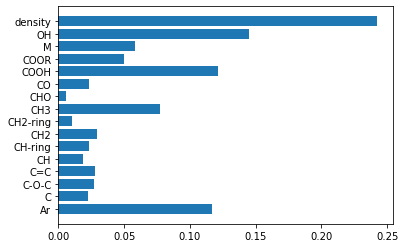

In [29]:
# feature importances
plt.barh(X_train.columns, xgb_best2_1.feature_importances_)
plt.show()

rmse of XGB with full features  = 1.1212615189489048


Text(0.5, 1.0, 'XGB - full features')

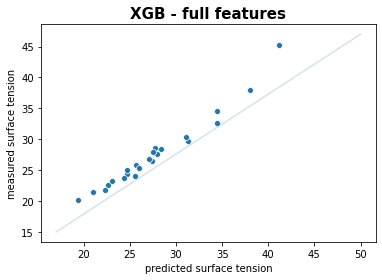

In [30]:
print(f"rmse of XGB with full features  = {np.sqrt(mean_squared_error(y_test, xgb_best2_1.predict(X_test)))}")
sns.scatterplot(xgb_best2_1.predict(X_test), y_test)
sns.lineplot(x=[17, 50], y=[15, 47], alpha=0.2)
plt.xlabel('predicted surface tension')
plt.ylabel('measured surface tension')
plt.title('XGB - full features', {'fontsize': 15, 'weight': 'bold'})

## Fragments only (scaled by molecular weight)

In [31]:
def scale_M(df):
    # df contains all numeric features
    # this function drops 'density' feature and normalizes the molecular fragments by molecular weight
    return df[df.columns.difference(['density', 'M'])].divide(df['M'], axis=0)

In [32]:
X_train = scale_M(X_train)
X_valid = scale_M(X_valid)
X_test = scale_M(X_test)

In [76]:
# trials3 = Trials()
# optimize(trials3)

Training with params :                                                                                                 
{'colsample_bytree': 0.75, 'eta': 0.04, 'eval_metric': 'rmse', 'gamma': 0.6000000000000001, 'max_depth': 7, 'min_child_weight': 3.0, 'n_estimators': 410.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.55}
	Score 1.9957422915185026                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.9, 'eta': 0.04, 'eval_metric': 'rmse', 'gamma': 0.8500000000000001, 'max_depth': 8, 'min_child_weight': 3.0, 'n_estimators': 442.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 1.0}
	Score 2.0405535991212966                                                                                              


Training with params :  

	Score 1.8839348604564483                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.7000000000000001, 'eta': 0.06, 'eval_metric': 'rmse', 'gamma': 0.6000000000000001, 'max_depth': 3, 'min_child_weight': 3.0, 'n_estimators': 398.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.6000000000000001}
	Score 1.9573211845320246                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.8500000000000001, 'eta': 0.04, 'eval_metric': 'rmse', 'gamma': 0.5, 'max_depth': 5, 'min_child_weight': 3.0, 'n_estimators': 375.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0

	Score 1.8248779783380182                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.6000000000000001, 'eta': 0.02, 'eval_metric': 'rmse', 'gamma': 0.8500000000000001, 'max_depth': 4, 'min_child_weight': 3.0, 'n_estimators': 777.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.8500000000000001}
	Score 1.9000148848440246                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.5, 'eta': 0.02, 'eval_metric': 'rmse', 'gamma': 1.0, 'max_depth': 4, 'min_child_weight': 5.0, 'n_estimators': 727.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.8}
	Score 1.79

Training with params :                                                                                                 
{'colsample_bytree': 0.9, 'eta': 0.08, 'eval_metric': 'rmse', 'gamma': 0.7000000000000001, 'max_depth': 11, 'min_child_weight': 4.0, 'n_estimators': 688.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.65}
	Score 2.027652375330176                                                                                               


Training with params :                                                                                                 
{'colsample_bytree': 0.65, 'eta': 0.02, 'eval_metric': 'rmse', 'gamma': 0.55, 'max_depth': 4, 'min_child_weight': 3.0, 'n_estimators': 154.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.75}
	Score 2.393925276976188                                                                                               


Training with params :              

	Score 1.887346478084895                                                                                               


Training with params :                                                                                                 
{'colsample_bytree': 0.75, 'eta': 0.08, 'eval_metric': 'rmse', 'gamma': 0.8500000000000001, 'max_depth': 12, 'min_child_weight': 3.0, 'n_estimators': 953.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.7000000000000001}
	Score 1.8783079269193972                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.7000000000000001, 'eta': 0.02, 'eval_metric': 'rmse', 'gamma': 0.65, 'max_depth': 2, 'min_child_weight': 3.0, 'n_estimators': 665.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.75}
	Score 

	Score 1.7644698566682628                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.55, 'eta': 0.02, 'eval_metric': 'rmse', 'gamma': 0.55, 'max_depth': 3, 'min_child_weight': 1.0, 'n_estimators': 934.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.5}
	Score 1.7861565294018755                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.6000000000000001, 'eta': 0.1, 'eval_metric': 'rmse', 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1.0, 'n_estimators': 996.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.55}
	Score 1.8789317777688737              

	Score 1.9746769759888603                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.5, 'eta': 0.02, 'eval_metric': 'rmse', 'gamma': 0.55, 'max_depth': 3, 'min_child_weight': 2.0, 'n_estimators': 689.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.6000000000000001}
	Score 1.71503063741422                                                                                                


Training with params :                                                                                                 
{'colsample_bytree': 0.5, 'eta': 0.02, 'eval_metric': 'rmse', 'gamma': 0.5, 'max_depth': 7, 'min_child_weight': 2.0, 'n_estimators': 697.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.65}
	Score 1.8693559532542006              

	Score 1.9253674943613566                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.5, 'eta': 0.02, 'eval_metric': 'rmse', 'gamma': 0.5, 'max_depth': 12, 'min_child_weight': 2.0, 'n_estimators': 606.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.55}
	Score 1.8754455547663766                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.55, 'eta': 0.02, 'eval_metric': 'rmse', 'gamma': 0.55, 'max_depth': 2, 'min_child_weight': 1.0, 'n_estimators': 560.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.7000000000000001}
	Score 1.8309322797006597            

	Score 1.8089436789832032                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.55, 'eta': 0.02, 'eval_metric': 'rmse', 'gamma': 0.5, 'max_depth': 10, 'min_child_weight': 1.0, 'n_estimators': 500.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.6000000000000001}
	Score 1.8439277920987838                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.5, 'eta': 0.02, 'eval_metric': 'rmse', 'gamma': 0.55, 'max_depth': 3, 'min_child_weight': 3.0, 'n_estimators': 779.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.7000000000000001}
	Score 1.78833197371973

	Score 1.834092623788469                                                                                               


Training with params :                                                                                                 
{'colsample_bytree': 0.65, 'eta': 0.02, 'eval_metric': 'rmse', 'gamma': 0.55, 'max_depth': 10, 'min_child_weight': 3.0, 'n_estimators': 898.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.55}
	Score 1.9374842479271317                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.5, 'eta': 0.04, 'eval_metric': 'rmse', 'gamma': 0.65, 'max_depth': 9, 'min_child_weight': 2.0, 'n_estimators': 975.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.5}
	Score 1.97638875450128                            

	Score 1.8439989533931074                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.6000000000000001, 'eta': 0.02, 'eval_metric': 'rmse', 'gamma': 0.75, 'max_depth': 6, 'min_child_weight': 1.0, 'n_estimators': 847.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.9500000000000001}
	Score 1.8950482817747432                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.5, 'eta': 0.02, 'eval_metric': 'rmse', 'gamma': 0.55, 'max_depth': 3, 'min_child_weight': 2.0, 'n_estimators': 678.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.5}
	Score 1.714414411230125

	Score 1.883964867885034                                                                                               


Training with params :                                                                                                 
{'colsample_bytree': 0.55, 'eta': 0.02, 'eval_metric': 'rmse', 'gamma': 0.75, 'max_depth': 8, 'min_child_weight': 1.0, 'n_estimators': 984.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.65}
	Score 1.8162656057032391                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.5, 'eta': 0.02, 'eval_metric': 'rmse', 'gamma': 0.7000000000000001, 'max_depth': 3, 'min_child_weight': 2.0, 'n_estimators': 888.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.6000000000000001}
	Score 1.74036940510693

In [33]:
# Training model with best params
xgb_best3 = xgb.XGBRegressor(n_estimators=656,
                            learning_rate=0.02,
                            max_depth=2,
                            min_child_weight=1,
                            subsample=0.6,
                            gamma=0.55,
                            colsample_by_tree=0.5,
                            objective='reg:squarederror',
                            n_jobs=6,
                            verbosity=3,
                            random_state=42)
xgb_best3.fit(X_train.append(X_valid), y_train.append(y_valid), early_stopping_rounds=25, eval_set=[(X_test, y_test)])

[21:39:21] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[0]	validation_0-rmse:27.1513
Will train until validation_0-rmse hasn't improved in 25 rounds.
[21:39:21] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[1]	validation_0-rmse:26.6579
[21:39:21] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[2]	validation_0-rmse:26.1767
[21:39:21] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[3]	validation_0-rmse:25.6984
[21:39:21] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[4]	validation_0-rmse:25.238
[21:39:21] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[5]	validation_0-rmse:24.7774
[21:39:21] INFO: src/tree/updater_prune.cc:74: tree pr

[21:39:21] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[56]	validation_0-rmse:10.3145
[21:39:21] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[57]	validation_0-rmse:10.1502
[21:39:21] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[58]	validation_0-rmse:9.99191
[21:39:21] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[59]	validation_0-rmse:9.83928
[21:39:21] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[60]	validation_0-rmse:9.67793
[21:39:21] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[61]	validation_0-rmse:9.52565
[21:39:21] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_dep

[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[112]	validation_0-rmse:4.8719
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[113]	validation_0-rmse:4.81826
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[114]	validation_0-rmse:4.7629
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[115]	validation_0-rmse:4.70721
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[116]	validation_0-rmse:4.65507
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[117]	validation_0-rmse:4.61455
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max

[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[168]	validation_0-rmse:3.11288
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[169]	validation_0-rmse:3.09809
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[170]	validation_0-rmse:3.07721
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[171]	validation_0-rmse:3.05441
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[172]	validation_0-rmse:3.03377
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[173]	validation_0-rmse:2.99842
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, m

[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[223]	validation_0-rmse:2.40006
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[224]	validation_0-rmse:2.39082
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[225]	validation_0-rmse:2.37751
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[226]	validation_0-rmse:2.36457
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[227]	validation_0-rmse:2.35605
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[228]	validation_0-rmse:2.35169
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, m

[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[279]	validation_0-rmse:2.01383
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[280]	validation_0-rmse:2.01026
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[281]	validation_0-rmse:2.00863
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[282]	validation_0-rmse:2.01274
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[283]	validation_0-rmse:2.01
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[284]	validation_0-rmse:2.00504
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_

[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[335]	validation_0-rmse:1.80843
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[336]	validation_0-rmse:1.80463
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[337]	validation_0-rmse:1.80579
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[338]	validation_0-rmse:1.80485
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[339]	validation_0-rmse:1.80234
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[340]	validation_0-rmse:1.80069
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, m

[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[391]	validation_0-rmse:1.7015
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[392]	validation_0-rmse:1.70107
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[393]	validation_0-rmse:1.70168
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[394]	validation_0-rmse:1.70312
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[395]	validation_0-rmse:1.69903
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[396]	validation_0-rmse:1.70557
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, ma

[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[447]	validation_0-rmse:1.62525
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[448]	validation_0-rmse:1.62489
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[449]	validation_0-rmse:1.62113
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[450]	validation_0-rmse:1.61879
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[451]	validation_0-rmse:1.62131
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[452]	validation_0-rmse:1.61819
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, m

[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[502]	validation_0-rmse:1.54614
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[503]	validation_0-rmse:1.54163
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[504]	validation_0-rmse:1.54101
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[505]	validation_0-rmse:1.53792
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[506]	validation_0-rmse:1.53841
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[507]	validation_0-rmse:1.53776
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, m

[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[557]	validation_0-rmse:1.47784
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[558]	validation_0-rmse:1.47954
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[559]	validation_0-rmse:1.47683
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[560]	validation_0-rmse:1.47924
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[561]	validation_0-rmse:1.47919
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[562]	validation_0-rmse:1.47883
[21:39:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, m

[21:39:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[613]	validation_0-rmse:1.43435
[21:39:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[614]	validation_0-rmse:1.43323
[21:39:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[615]	validation_0-rmse:1.43365
[21:39:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[616]	validation_0-rmse:1.42863
[21:39:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[617]	validation_0-rmse:1.42628
[21:39:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[618]	validation_0-rmse:1.42844
[21:39:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, m

XGBRegressor(colsample_by_tree=0.5, gamma=0.55, learning_rate=0.02, max_depth=2,
             n_estimators=656, n_jobs=6, objective='reg:squarederror',
             random_state=42, subsample=0.6, verbosity=3)

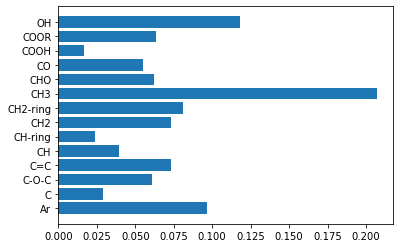

In [34]:
# feature importances
plt.barh(X_train.columns, xgb_best3.feature_importances_)
plt.show()

rmse of XGB with fragments/M  = 1.4129520878658632


Text(0.5, 1.0, 'XGB - full features')

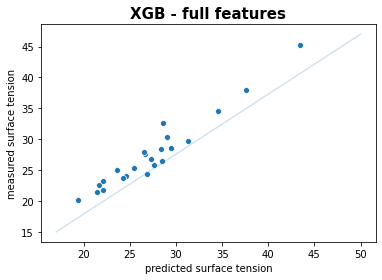

In [36]:
print(f"rmse of XGB with fragments/M  = {np.sqrt(mean_squared_error(y_test, xgb_best3.predict(X_test)))}")
sns.scatterplot(xgb_best3.predict(X_test), y_test)
sns.lineplot(x=[17, 50], y=[15, 47], alpha=0.2)
plt.xlabel('predicted surface tension')
plt.ylabel('measured surface tension')
plt.title('XGB - full features', {'fontsize': 15, 'weight': 'bold'})

## Fragments only (scaled by density)

In [81]:
def scale_density(df):
    # df contains all numeric features
    # this function drops 'density' feature and normalizes the molecular fragments by molecular weight
    return df[df.columns.difference(['density', 'M'])].divide(df['density'], axis=0)

In [84]:
X_train = scale_density(X_train)
X_valid = scale_density(X_valid)
X_test = scale_density(X_test)

In [85]:
trials4 = Trials()
optimize(trials4)

Training with params :                                                                                                 
{'colsample_bytree': 0.8500000000000001, 'eta': 0.06, 'eval_metric': 'rmse', 'gamma': 0.6000000000000001, 'max_depth': 11, 'min_child_weight': 6.0, 'n_estimators': 216.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.7000000000000001}
	Score 1.632348413476564                                                                                               


Training with params :                                                                                                 
{'colsample_bytree': 0.65, 'eta': 0.04, 'eval_metric': 'rmse', 'gamma': 0.9, 'max_depth': 7, 'min_child_weight': 1.0, 'n_estimators': 577.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.9}
	Score 1.5138064469376726                                                                                              


Training 

	Score 1.4694386470520127                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 1.0, 'eta': 0.02, 'eval_metric': 'rmse', 'gamma': 0.7000000000000001, 'max_depth': 12, 'min_child_weight': 3.0, 'n_estimators': 638.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.55}
	Score 1.3672261591049104                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.8500000000000001, 'eta': 0.06, 'eval_metric': 'rmse', 'gamma': 0.9500000000000001, 'max_depth': 4, 'min_child_weight': 6.0, 'n_estimators': 522.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.950000000000

Training with params :                                                                                                 
{'colsample_bytree': 0.7000000000000001, 'eta': 0.06, 'eval_metric': 'rmse', 'gamma': 0.7000000000000001, 'max_depth': 10, 'min_child_weight': 1.0, 'n_estimators': 623.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.55}
	Score 1.458551032385683                                                                                               


Training with params :                                                                                                 
{'colsample_bytree': 0.8500000000000001, 'eta': 0.04, 'eval_metric': 'rmse', 'gamma': 0.7000000000000001, 'max_depth': 10, 'min_child_weight': 1.0, 'n_estimators': 655.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.5}
	Score 1.3001920533546043                                                                                          

	Score 1.3079980442194525                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.7000000000000001, 'eta': 0.04, 'eval_metric': 'rmse', 'gamma': 0.9500000000000001, 'max_depth': 10, 'min_child_weight': 3.0, 'n_estimators': 879.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.8}
	Score 1.509084741891283                                                                                               


Training with params :                                                                                                 
{'colsample_bytree': 0.65, 'eta': 0.06, 'eval_metric': 'rmse', 'gamma': 0.7000000000000001, 'max_depth': 6, 'min_child_weight': 2.0, 'n_estimators': 720.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.75}
	Score 1

	Score 1.4176013132990068                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.8500000000000001, 'eta': 0.06, 'eval_metric': 'rmse', 'gamma': 0.7000000000000001, 'max_depth': 6, 'min_child_weight': 2.0, 'n_estimators': 715.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.6000000000000001}
	Score 1.3828526756907793                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.9, 'eta': 0.1, 'eval_metric': 'rmse', 'gamma': 0.75, 'max_depth': 11, 'min_child_weight': 1.0, 'n_estimators': 930.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.55}
	Score 1.

	Score 1.5250839069007889                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.75, 'eta': 0.04, 'eval_metric': 'rmse', 'gamma': 0.9, 'max_depth': 10, 'min_child_weight': 1.0, 'n_estimators': 819.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.5}
	Score 1.3290147718464935                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.9, 'eta': 0.08, 'eval_metric': 'rmse', 'gamma': 0.8500000000000001, 'max_depth': 10, 'min_child_weight': 2.0, 'n_estimators': 783.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.55}
	Score 1.2122355065996595            

	Score 1.3437726717014267                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.8, 'eta': 0.08, 'eval_metric': 'rmse', 'gamma': 0.8, 'max_depth': 12, 'min_child_weight': 2.0, 'n_estimators': 622.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.6000000000000001}
	Score 1.326499455102604                                                                                               


Training with params :                                                                                                 
{'colsample_bytree': 0.9500000000000001, 'eta': 0.06, 'eval_metric': 'rmse', 'gamma': 0.9, 'max_depth': 3, 'min_child_weight': 1.0, 'n_estimators': 763.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.5}
	Score 1.5157156009521713

	Score 1.4732360131664504                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.9, 'eta': 0.08, 'eval_metric': 'rmse', 'gamma': 0.8500000000000001, 'max_depth': 12, 'min_child_weight': 2.0, 'n_estimators': 903.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.65}
	Score 1.2525619935164474                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.9500000000000001, 'eta': 0.08, 'eval_metric': 'rmse', 'gamma': 0.9, 'max_depth': 6, 'min_child_weight': 1.0, 'n_estimators': 515.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.6000000000000001}
	Score 1.

	Score 1.4530424755344966                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.6000000000000001, 'eta': 0.06, 'eval_metric': 'rmse', 'gamma': 1.0, 'max_depth': 3, 'min_child_weight': 3.0, 'n_estimators': 706.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.5}
	Score 1.570161894798193                                                                                               


Training with params :                                                                                                 
{'colsample_bytree': 0.9500000000000001, 'eta': 0.04, 'eval_metric': 'rmse', 'gamma': 0.9500000000000001, 'max_depth': 6, 'min_child_weight': 1.0, 'n_estimators': 814.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.85000000000000

	Score 1.4975906099723673                                                                                              


100%|██████████████████████████████████████████████| 250/250 [04:57<00:00,  1.19s/trial, best loss: 1.2122355065996595]
{'colsample_bytree': 0.9, 'eta': 0.08, 'gamma': 0.8500000000000001, 'max_depth': 9, 'min_child_weight': 2.0, 'n_estimators': 783.0, 'subsample': 0.55}


# Preparation of test set

In [25]:
df_test = pd.read_csv('../data/polyesters.csv')
df_diols_fe1 = pd.read_csv('../data/df_diols_fe1.csv', index_col=0)
df_acids_fe1 = pd.read_csv('../data/df_acids_fe1.csv', index_col=0)

# correcting 'O-alc', 'O-acid' and 'O-ester' by subtracting atom/functional group loss from condensation
df_diols_fe1['OH'] -= 2
df_acids_fe1['COOH'] -= 2
df_acids_fe1['COOR'] += 2

df_monomers_fe1 = pd.concat([df_diols_fe1, df_acids_fe1])
df_monomers_fe1

monomers = df_test.columns[df_test.columns.str.contains('diol|acid')]
features = df_monomers_fe1.columns

df_test_fe1 = avg_monomer_features(df_test, df_monomers_fe1, monomers, features)
st_test = df_test['measured_st']

### TEST 3

In [29]:
X_test3 = (df_test_fe1[df_test_fe1.columns.difference(['M']+features_excluded)]
           .divide(df_test_fe1['M']-18, axis=0))
y_hat_test3 = xgb_best3.predict(X_test3)

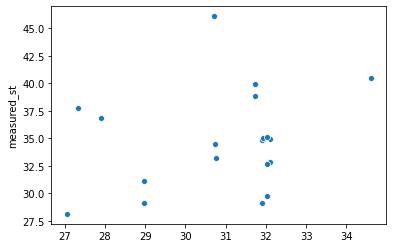

In [33]:
sns.scatterplot(y_hat_test3, st_test)

In [34]:
print(f"rmse = {np.sqrt(np.mean((y_hat_test3-st_test)**2))}")

rmse = 5.882487733694858
